### Masive Data Lab Activities

Description : Read and Cleaning Data
File        : bitcoin_price.csv 
Name        : Yudi Aditya

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Bitcoin Cash Price

#### 1. Reading Data

In [2]:
# Read Bitcoin Cash Price
df1 = pd.read_csv('../data/raw/cryptocurrencypricehistory/bitcoin_price.csv', parse_dates = ['Date'])
df1.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-09-05,4228.29,4427.84,3998.11,4376.53,2697970000,69954400000
1,2017-09-04,4591.63,4591.63,4108.40,4236.31,2987330000,75955500000
2,2017-09-03,4585.27,4714.08,4417.59,4582.96,1933190000,75841700000
3,2017-09-02,4901.42,4975.04,4469.24,4578.77,2722140000,81060600000
4,2017-09-01,4701.76,4892.01,4678.53,4892.01,2599080000,77748400000


In [3]:
type(df1.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [4]:
# Set Date as it's index
df1.set_index('Date', inplace = True )

In [5]:
# Get General Information regarding data frame
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1592 entries, 2017-09-05 to 2013-04-28
Data columns (total 6 columns):
Open          1592 non-null float64
High          1592 non-null float64
Low           1592 non-null float64
Close         1592 non-null float64
Volume        1592 non-null object
Market Cap    1592 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 87.1+ KB


- The data frame has 1592 entries and 6 columns. 
- All columns has 1592 elements, probably there's no missing data. Especially for Open, high, Low, Close and Market Cap. To make it sure, We'll see for this
- Volume's data type is an object, it should be number.

After checking using open refine, i found missing data in Volume, but it use "-". df.info() method recognize it as a string. We have to replace it as a NaN

In [6]:
# Replace missing data as NaN
df1.replace('-', np.nan,inplace=True)
df1[df1['Volume'].isnull()].head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-12-26,683.94,777.75,683.94,761.98,NaN,8326270000
2013-12-25,666.31,682.70,649.48,682.21,NaN,8108930000
2013-12-24,672.36,684.39,645.71,665.58,NaN,8179730000
2013-12-23,613.06,680.91,611.04,673.41,NaN,7455670000
2013-12-22,601.78,666.74,585.64,617.18,NaN,7315940000


In [7]:
# Count missing data in each column
df1.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume        243
Market Cap      0
dtype: int64

#### 2. Cleaning Data Part 1 (Deal with Wrong Format)

Problem  : 
- Volume recognized as a string 
- Missing 243 from 1592 data in Volume 

Solution :
- Convert volume from string to float data type
- interpolation or using mean    

In [8]:
print('Volume Data Type :', type(df1.Volume[0]))

Volume Data Type : <class 'str'>


In [9]:
# Convert string to float in volume
df1.Volume = df1.Volume.astype('float64')
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1592 entries, 2017-09-05 to 2013-04-28
Data columns (total 6 columns):
Open          1592 non-null float64
High          1592 non-null float64
Low           1592 non-null float64
Close         1592 non-null float64
Volume        1349 non-null float64
Market Cap    1592 non-null int64
dtypes: float64(5), int64(1)
memory usage: 167.1 KB


#### 3. Cleaning Data 2 (Deal with Missing Data)

In [10]:
#new_df is the data with non NaN value
new_df = df1[np.isfinite(df1['Volume'])]
new_df.tail()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-12-31,760.32,760.58,738.17,754.01,20897300.0,9268240000
2013-12-30,741.35,766.60,740.24,756.13,20707700.0,9037000000
2013-12-29,728.05,748.61,714.44,745.05,19011300.0,8872600000
2013-12-28,737.98,747.06,705.35,727.83,32505800.0,8990850000
2013-12-27,763.28,777.51,713.60,735.07,46862700.0,9295570000


In [11]:
# Lets see the correlation between each column
correlation = new_df.corr(method="pearson")
correlation

,Open,High,Low,Close,Volume,Market Cap
Open,1.000000,0.999072,0.998898,0.998295,0.925801,0.998166
High,0.999072,1.000000,0.998547,0.999152,0.931968,0.997222
Low,0.998898,0.998547,1.000000,0.999175,0.919361,0.997310
Close,0.998295,0.999152,0.999175,1.000000,0.926548,0.996643
Volume,0.925801,0.931968,0.919361,0.926548,1.000000,0.930441
Market Cap,0.998166,0.997222,0.997310,0.996643,0.930441,1.000000


In the data frame above, we can inferred that Volume has a strong relationship (Linear) with High.

Let's plot data between Market Cap and other variable, then see the relation between the data

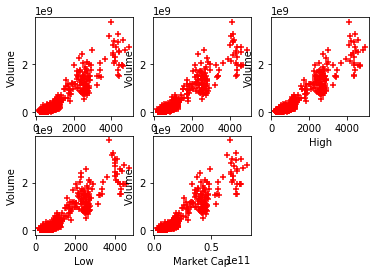

In [12]:
import matplotlib.pyplot as plt
def plot_data(xdata,ydata,xlabel):
    plt.scatter(xdata,ydata,marker='+',color='red')
    plt.ylabel('Volume')
    plt.xlabel(xlabel)
        
plt.subplot(2,3,1)
plot_data(new_df.Open, new_df.Volume,'Open')
plt.subplot(2,3,2)
plot_data(new_df.Close, new_df.Volume,'Close')
plt.subplot(2,3,3)
plot_data(new_df.High, new_df.Volume,'High')
plt.subplot(2,3,4)
plot_data(new_df.Low, new_df.Volume,'Low')
plt.subplot(2,3,5)
plot_data(new_df['Market Cap'], new_df.Volume,'Market Cap')

The figures above show that Volume and High has the best relationship (Linear relationship).

In [13]:
from sklearn import linear_model

model   = linear_model.LinearRegression()
High    = new_df[['High']]
Volume  = new_df['Volume']

In [14]:
# train data using linear regression 
model.fit(High, Volume)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
# Model Score
model.score(High, Volume)

0.8685636745068508

In [16]:
# Fill Missing Data Using linear model prediction 
# and Assign it to new column
High = df1[['High']]
volume_predict = model.predict(High) 
df1['Volume Predict'] = volume_predict.astype('int64')
df1[df1['Volume'].isnull()].head()

,Open,High,Low,Close,Volume,Market Cap,Volume Predict
Date,,,,,,,
2013-12-26,683.94,777.75,683.94,761.98,NaN,8326270000,215531709
2013-12-25,666.31,682.70,649.48,682.21,NaN,8108930000,162795889
2013-12-24,672.36,684.39,645.71,665.58,NaN,8179730000,163733538
2013-12-23,613.06,680.91,611.04,673.41,NaN,7455670000,161802758
2013-12-22,601.78,666.74,585.64,617.18,NaN,7315940000,153940932


#### 4. Data Visualization 

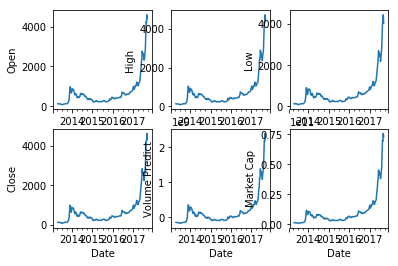

In [17]:
# Visualization the average of each column based on time (Week)
%matplotlib inline
    
plt.subplot(2,3,1)
plt.ylabel('Open')
df1.Open.resample('W').mean().plot()

plt.subplot(2,3,2)
plt.ylabel('High')
df1.High.resample('W').mean().plot()

plt.subplot(2,3,3)
plt.ylabel('Low')
df1.Low.resample('W').mean().plot()

plt.subplot(2,3,4)
plt.ylabel('Close')
df1.Close.resample('W').mean().plot()

plt.subplot(2,3,5)
plt.ylabel('Volume Predict')
df1['Volume Predict'].resample('W').mean().plot()

plt.subplot(2,3,6)
plt.ylabel('Market Cap')
df1['Market Cap'].resample('W').mean().plot()